# Notebook 3: Stochastic Gradient Descent

Gradient descent is the workhorse of machine learning. The goal of this notebook is to develop the basic algorithms in the context of two common problems: a simple linear regression and logistic regression for binary classification.

This notebook was written by [Joe Boyd](https://github.com/jcboyd), [Judith Abecassis](https://github.com/judithabk6) and [Chloé-Agathe Azencott](http://cazencott.info), with inspiration from [the AM207 course at Harvard](http://am207.github.io/2016/) and [Francis Bach](http://www.di.ens.fr/%7Efbach/orsay2018.html).


__If you are taking this class for credit, you will need to turn in your completed notebook on Campus.__

In [1]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [2]:
plt.rc('font', **{'size': 12}) # règle la taille de police globalement pour les plots (en pt)

In [3]:
# Obtaining the colors that matplotlib cycles on
# to be able to use them directly
# see: https://matplotlib.org/stable/gallery/color/color_cycle_default.html
prop_cycle = plt.rcParams['axes.prop_cycle']
notebook_colors = prop_cycle.by_key()['color']

## 1. Linear regression

In this section, we will solve a simple linear regression between two variables: the number of features is 1.

### 1.1 Generating data

Here we use the `make_regression` method of `sklearn.datasets` ([doc](https://scikit-learn.org/stable/modules/generated/sklearn.datasets.make_regression.html)) to generate our data:

In [4]:
from sklearn import datasets

In [5]:
n_samples = 100
n_features = 1
X, y = datasets.make_regression(n_samples=n_samples, n_features=n_features, n_informative=1, noise=20, random_state=37)

In [6]:
X.shape, y.shape

((100, 1), (100,))

Let us visualize the data we have generated:

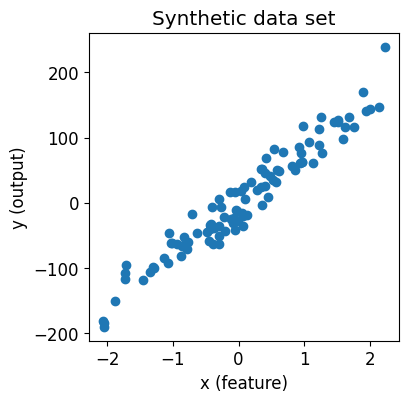

In [7]:
# create figure
fig = plt.figure(figsize=(4, 4))
plt.xlabel("x (feature)")
plt.ylabel("y (output)")
plt.title("Synthetic data set")

plt.scatter(X, y)
plt.show()

### 1.2 Optimization problem

Given a data matrix of $n$ samples in $p$ dimensions $X \in \mathbb{R}^{nxp}$ (in our simulation, $p=1$) and an output vector $\boldsymbol{y} \in \mathbb{R}^{n}$, the objective of a linear regression is to learn a linear function,

$$f: \boldsymbol{x} \in \mathbb{R}^p \mapsto \beta_0 + \boldsymbol{\beta}^\top \boldsymbol{x}$$

where $\beta_0 \in \mathbb{R}$ and $\boldsymbol\beta \in \mathbb{R}^p$.

This is achieved by __minimizing the empirical risk__, computed with the quadratic error as loss function: $\frac1n \sum_{i=1}^n \left(y_i - f(\boldsymbol{x}_i)\right)^2$.

The $\beta_0$ parameter corresponds to an intercept (or bias) term.

#### Bias trick
To simplify the equations, we append a column of 1s to the matrix $X$.

$$
\underbrace{
\begin{bmatrix}
    x_{11} & x_{12} & \dots & x_{1p} \\
    x_{21} & x_{22} & \dots & x_{2p} \\
    \vdots & \vdots & \ddots & \vdots \\
    x_{n1} & x_{n2} & \dots & x_{np}
\end{bmatrix}}_{X} \to
\underbrace{
\begin{bmatrix}
    1 & x_{11} & x_{12} & \dots & x_{1p} \\
    1 & x_{21} & x_{22} & \dots & x_{2p} \\
    \vdots & \vdots & \vdots & \ddots & \vdots \\
    1 & x_{n1} & x_{n2} & \dots & x_{np}
\end{bmatrix}}_{\text{$X$ with bias variable}}
$$

Now we can simply use
$f: \boldsymbol{x} \in \mathbb{R}^{p+1} \mapsto \boldsymbol{\beta}^\top \boldsymbol{x}$ with $\boldsymbol{\beta} \in \mathbb{R}^{p+1}$.

This is called the __bias trick.__

Let us now compute the numpy array `X_bt` that corresponds to our data matrix `X`:

In [8]:
X_bt = np.hstack((np.ones((n_samples, 1)), X))

We will now work with matrix `X_bt`.

#### Closed-form solution

The empirical risk minimization can be rewritten as:
$$\boldsymbol{\beta}^* \in \arg\min \frac{1}{n}\sum_{i=1}^n \left(y_i - \boldsymbol{\beta}^\top \boldsymbol{x}_i \right)^2 = \frac{1}{n}\left(\boldsymbol{y} - X \boldsymbol\beta\right)^\top(\boldsymbol{y} - X\boldsymbol\beta)$$

This is a convex optimization problem, so to solve it we can differentiate the function to minimize and set its gradient to zero.

We obtain
$(X^\top X) \boldsymbol\beta^* =  X^\top \boldsymbol{y},$

which, __if $X^\top X$ can be inverted__, leads to a unique solution
$\boldsymbol\beta^* = (X^\top X)^{-1} X^\top \boldsymbol{y}.$

If $X^\top X$ cannot be inverted, the above problem has an infinity of solutions. They can also be expressed analytically by replacing $(X^\top X)^{-1}$ with a [pseudoinverse](https://en.wikipedia.org/wiki/Moore%E2%80%93Penrose_inverse) of $X^\top X.$

##### __Question 1__
Use `np.linalg.inv` ([doc](https://numpy.org/doc/stable/reference/generated/numpy.linalg.inv.html)) to compute the vector `beta_star` that is solution to the ordinary least squares in our data

In [9]:
import numpy as np

In [10]:
beta_star = np.linalg.inv(X_bt.T @ X_bt) @ X_bt.T @ y
print(beta_star)

[-0.7026677  78.51880761]


#### Quality of the model

We can now evaluate the quality of the fit of the closed-form solution model. Note that here we are only concerned with fitting the data, and not about generalization.

##### __Question 2__
Compute the vector `y_pred` of outputs predicted by the obtained model on the data

In [11]:
y_pred = X_bt @ beta_star
print(y_pred.shape)

(100,)


We can now visualize the regression line we have just learned, and plot the predicted values of $y$ versus the true values:

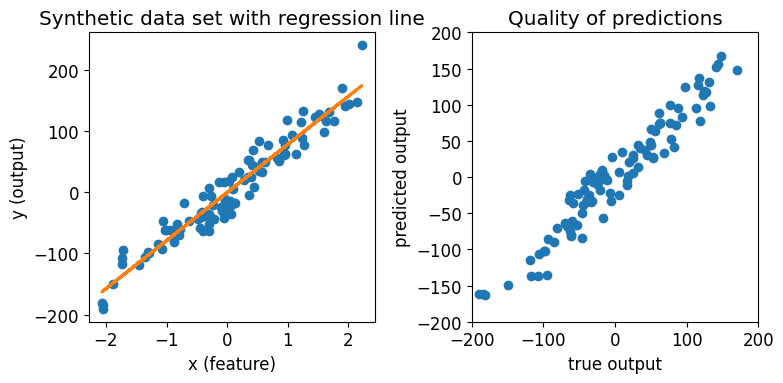

In [12]:
# create figure
fig = plt.figure(figsize=(8, 4))

plt.subplot(1, 2, 1)
plt.xlabel("x (feature)")
plt.ylabel("y (output)")
plt.title("Synthetic data set with regression line")
plt.scatter(X, y)
plt.plot(X, y_pred, lw=2, color=notebook_colors[1])

plt.subplot(1, 2, 2)
plt.xlabel("true output")
plt.ylabel("predicted output")
plt.xlim([-200, 200])
plt.ylim([-200, 200])
plt.title("Quality of predictions")
plt.scatter(y, y_pred)

fig.tight_layout()

We can also quantify the error with the RMSE, or Root Mean Squared Error, defined by
$$\sqrt{\sum_{i=1}^n \frac1n \left(y_i - f(\boldsymbol{x}_i)\right)^2}$$

In [13]:
def root_mean_squared_error(y_true, y_predicted):
    return np.sqrt(np.sum((y_true - y_predicted)**2)/np.size(y))

print(f'RMSE: {root_mean_squared_error(y, y_pred):.2f}')

RMSE: 20.97


#### Relationship between noise and RMSE

##### __Question 3__
Complete the code below to compute the RMSE of a linear regression fitted to data as a function of the value of the `noise` parameter. Comment.

In [14]:
def play_with_noise(noise_value):
    """
    Return the RMSE of a univariate linear regression on data generated with noise parameter noise_value.
    """
    X, y = datasets.make_regression(n_samples=n_samples, n_features=n_features, n_informative=1, noise=noise_value, random_state=37)
    X_bt = np.hstack((np.ones((n_samples, 1)), X))
    beta_star = np.linalg.inv(X_bt.T @ X_bt) @ X_bt.T @ y
    y_pred = X_bt @ beta_star
    return(root_mean_squared_error(y, y_pred))

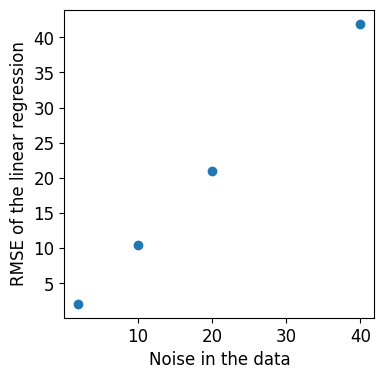

In [15]:
fig = plt.figure(figsize=(4, 4))
plt.xlabel("Noise in the data")
plt.ylabel("RMSE of the linear regression")


noise_values = [2, 10, 20, 40]
plt.scatter(noise_values, [play_with_noise(x) for x in noise_values])
plt.show()

__Comment:__ The relationship between the noise values and the RMSE is linear and almost exactly 1:1.

### 1.3 Gradient descent

It will not always be possible to use a closed-form solution of the empirical risk minimization problem.

In the case of linear regression, there are two reasons why we might not want to use the closed-form solution:
* if $X^\top X$ cannot be inverted (which happens if some of the features are correlated, or if the number of features is larger than the number of columns);
* if $X^\top X$ is invertible but of large dimension, ie. when the number of features is large. Indeed, matrix inversion is _cubic_ in the dimension of the matrix.

When the empirical risk minimization problem is convex, __gradient descent__ finds a solution by progressing iteratively in the direction opposite the gradient. Specifically, at each iteration $t$, the vector $\boldsymbol\beta$ is updated by:
$$\boldsymbol\beta^{(t+1)} = \boldsymbol\beta^{(t)} - \alpha \nabla_{\boldsymbol\beta} J(\boldsymbol\beta^{(t)}),$$
where $J: \mathbb{R}^d \rightarrow \mathbb{R} $ is the function to minimize.

In the case of the ordinary least squares, $d=p+1$ and $J(\boldsymbol\beta) = \frac{1}{n}\left(\boldsymbol{y} - X \boldsymbol\beta\right)^\top(\boldsymbol{y} - X\boldsymbol\beta).$

$\alpha$ is the step size of the gradient descent, also called the __learning rate.__

The gradient descent is stopped either when a preset maximum number of iterations is reached, or when the norm of the gradient is less than a preset error level (called __tolerance__).

#### Gradient of the empirical risk of the linear regression
For ordinary least squares, the gradient of the function to minimize is:

$$\nabla_{\boldsymbol\beta} J(\boldsymbol\beta) = \frac1n X^\top \left(X \boldsymbol\beta - y \right).$$

##### __Question 4__
Complete the code below to evaluate the gradient of the empirical risk of the linear regression:

In [16]:
def evaluate_gradient(X, y, b_vector):
    return (1 / y.shape[0]) * X.T @ (X @ b_vector - y)

Let us check the value of the gradient at our solution `beta_star`:

In [17]:
print(f"In the closed-form solution beta_star, the norm of the gradient is {np.linalg.norm(evaluate_gradient(X_bt, y, beta_star)):.2e}")

In the closed-form solution beta_star, the norm of the gradient is 3.88e-14


##### __Question 5__
Does this value match your expectations?

__Answer:__ Not really, since it's an analytical solution, I would have expected the value of the gradient to be exactly zero.

#### Batch gradient descent

In batch gradient descent, we use the entire data set at each iteration.

##### __Question 6__
Complete the `batch_gradient_descent` function below.

In [23]:
def squared_loss(X, y, b_vector):
    """
    Squared loss of a linear regression.
    Parameters:
    X: (n_samples, n_features) numpy array
        The data matrix.

    y: (n_samples, ) numpy array
        The output/target vector.

    b_vector: (n_features, ) numpy array
        The weight vector of the linear regression.
    """
    return(np.sum((y - X @ b_vector)**2)/np.size(y))

print(np.random.rand(5,2 ))

[[0.58299705 0.15743852]
 [0.34127308 0.10018137]
 [0.89465878 0.08229809]
 [0.80685262 0.17855812]
 [0.58022651 0.11367475]]


In [24]:
def batch_gradient_descent(X, y, learning_rate=1e-1, max_iters=30, tol=1e-2):
    """
    Batch gradient descent procedure for a linear regression.
    Parameters:
    X: (n_samples, n_features) numpy array
        The data matrix.

    y: (n_samples, ) numpy array
        The output/target vector.

    learning_rate: float
        The learning rate of the gradient descent.

    max_iters: int
        The maximum number of iterations of the gradient descent.

    tol: float
        The tolerance of the gradient descent:
        the gradient descent will stop when the norm of the gradient is smaller than the tolerance.
    """
    # Random initialisation of beta
    beta_current = np.random.rand(X.shape[1])

    # Keep track of the values of the loss and of beta at each iteration
    losses = [squared_loss(X, y, beta_current)]
    betas = [beta_current.copy()]

    for iter_idx in range(1, max_iters+1):
        # compute the gradient
        gradient = evaluate_gradient(X, y, beta_current)

        # update beta_current
        beta_current -= learning_rate * gradient

        # compute the loss and append to losses
        losses.append(squared_loss(X, y, beta_current))

        # append beta_current to losses
        betas.append(beta_current.copy())

        # check whether tolerance is reached
        # (you can use np.linalg.norm to compute the norm of a vector)
        if np.linalg.norm(gradient) < tol:
            print(f"Gradient descent stopped after {iter_idx} iterations")
            break

    return(np.array(losses), np.array(betas))

We can now run the batch gradient descent on the data and observe how beta and the loss evolve:

In [36]:
tolerance = 1e-4
iterations = 35
lr = 2e-2
losses, betas = batch_gradient_descent(X_bt, y, learning_rate=lr, max_iters=iterations, tol=tolerance)

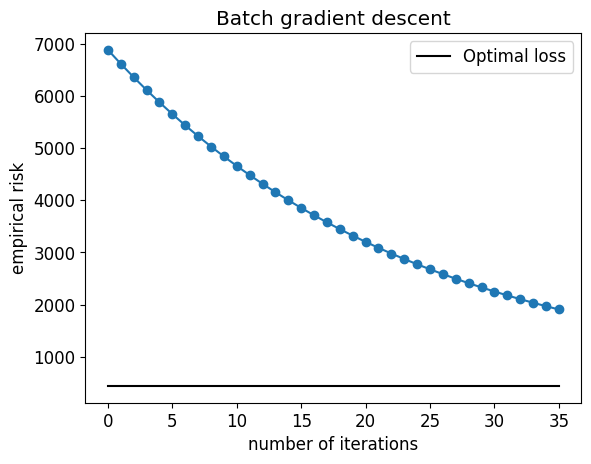

In [37]:
plt.plot(np.arange(len(losses)), losses, 'o-')

beta_star_loss = squared_loss(X_bt, y, beta_star)
plt.plot([0, iterations], [beta_star_loss, beta_star_loss], 'k-', label="Optimal loss")

plt.xlabel("number of iterations")
plt.ylabel("empirical risk")
plt.title("Batch gradient descent")
plt.legend()
plt.show()

##### __Question 7__
Has your gradient descent stopped because you've reached the maximum number of parameters or the tolerance? If yes, what parameter(s) do you think you could change to actually go below tolerance? Experiment below and comment.

__Comment:__ No it seems that my gradient descent stopped because we reached the maximum number of iterations. When I increase the number of iterations, my empirical risk eventually gets to zero, which makes me wary of whether or not I might have done something wrong here.

#### Quality of the model

We can now evaluate the quality of the fit of the model learned by our gradient descent, and compare it to the model we obtained with the closed-form solution.

##### __Question 8__
Use the code below to look at the quality of a gradient descent that hasn't converged yet. Comment.

In [40]:
tolerance = 1e-4
iterations = 100
lr = 2e-2
losses, betas = batch_gradient_descent(X_bt, y, learning_rate=lr, max_iters=iterations, tol=tolerance)

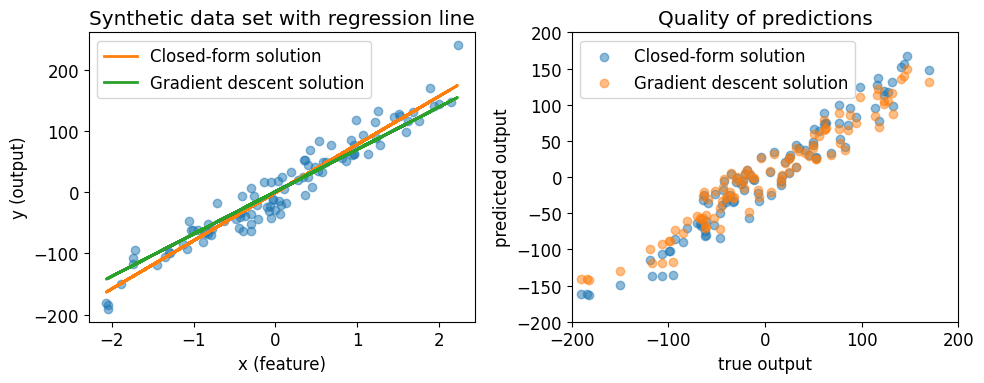

In [41]:
y_pred_gd = X_bt.dot(betas[-1])
# create figure
fig = plt.figure(figsize=(10, 4))

plt.subplot(1, 2, 1)
plt.xlabel("x (feature)")
plt.ylabel("y (output)")
plt.title("Synthetic data set with regression line")
plt.scatter(X, y, alpha=0.5)
plt.plot(X, y_pred, lw=2, color=notebook_colors[1], label='Closed-form solution')
plt.plot(X, y_pred_gd, lw=2, color=notebook_colors[2], label='Gradient descent solution')
plt.legend()

plt.subplot(1, 2, 2)
plt.xlabel("true output")
plt.ylabel("predicted output")
plt.xlim([-200, 200])
plt.ylim([-200, 200])
plt.title("Quality of predictions")
plt.scatter(y, y_pred, label="Closed-form solution", alpha=0.5)
plt.scatter(y, y_pred_gd, label="Gradient descent solution", alpha=0.5)
plt.legend()

fig.tight_layout()

__Comment:__ With only 35 iterations, this gradient descent solution has not fully converged, so it does not match the data as precisely as the closed-form solution does. When we switch to 100 iterations, we see that it much more closely follows both the data and the closed-form solution.

#### Gradient descent visualization

You can use the following code to visualize the gradient descent.

In [42]:
tolerance = 1e-4
iterations = 35
lr = 5e-1
losses, betas = batch_gradient_descent(X_bt, y, learning_rate=lr, max_iters=iterations, tol=tolerance)

Gradient descent stopped after 21 iterations


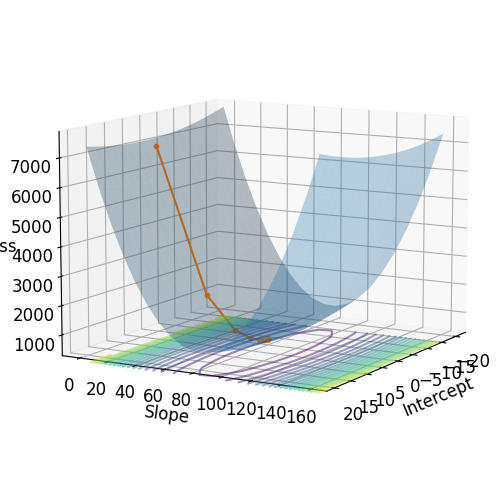

In [43]:
from mpl_toolkits.mplot3d import Axes3D

# Create mesh grid
ms = np.linspace(beta_star[0] - 20 , beta_star[0] + 20, 20)
bs = np.linspace(beta_star[1] - 80 , beta_star[1] + 80, 20)
M, B = np.meshgrid(ms, bs)

# Compute the squared loss in each point of the mesh grid
zs = np.array([squared_loss(X_bt, y, theta)
               for theta in zip(np.ravel(M), np.ravel(B))])
Z = zs.reshape(M.shape)

# create 3D axis object
fig = plt.figure(figsize=(10, 6))
ax = fig.add_subplot(1, 1, 1, projection='3d', xlabel='Intercept',
                     ylabel='Slope', zlabel='Loss')

# plot loss hypersurface and contours
ax.plot_surface(M, B, Z, rstride=1, cstride=1, alpha=0.3)
ax.contour(M, B, Z, 20, alpha=0.5, offset=0, stride=30)

# plot gradient descent
ax.plot(betas[:, 0], betas[:, 1], losses, '.-')

# set viewpoint
ax.view_init(elev=10, azim=30)

#### Newton-Raphson

When the function $J$ to optimize is twice differentiable, the Newton-Raphson procedure consists in using $\| \nabla^2 J(\boldsymbol\beta^{(t)}) \|$ as learning rate at update $t$ :

$$\boldsymbol\beta^{(t+1)} = \boldsymbol\beta^{(t)} - \|\nabla^2 J(\boldsymbol\beta^{(t)})\|^{-1} \nabla J(\boldsymbol\beta^{(t)})$$

In our case, $\|\nabla^2 J(\boldsymbol\beta)\| = \|X^\top X\|= \sigma_{\max}$, where $\sigma_{\max}$ is the largest eigenvalue of $X^\top X$.

The learning rate suggested by this procedure is constant and equal to $\frac1{\sigma_{\max}}.$

##### __Question 9__
Define `learning_rates_list` below to compare several learning rates, including $\frac1{\sigma_{\max}}$ and rates both lower and smaller than $\frac1{\sigma_{\max}}$. Comment.

__Remark:__ Note that you can replace `plot` with `semilogy` to use a logarithmic scale on the y-axis and better see differences in the lower values of the loss.

In [44]:
# Compute the eigenvalues of X'X
eigens = np.linalg.eigvals(X_bt.T.dot(X_bt)/X_bt.shape[0])
sigma_max = np.max(eigens)
print(sigma_max)

1.0888110459983547


Gradient descent stopped after 8 iterations
Gradient descent stopped after 24 iterations


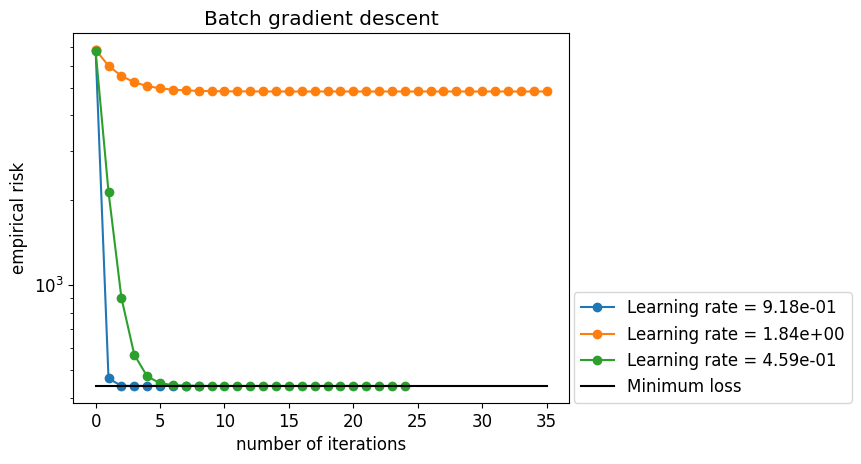

In [53]:
learning_rates_list = [1/sigma_max, 1/(sigma_max * 0.5), 1/(sigma_max * 2)]
for lr in learning_rates_list:
    # Run the batch gradient descent
    losses, betas = batch_gradient_descent(X_bt, y, learning_rate=lr, max_iters=iterations, tol=tolerance)

    # Plot loss
    plt.semilogy(np.arange(len(losses)), losses, 'o-', label="Learning rate = %.2e" % lr)

beta_star_loss = squared_loss(X_bt, y, beta_star)

plt.semilogy([0, iterations], [beta_star_loss, beta_star_loss], 'k-', label="Minimum loss")
plt.xlabel("number of iterations")
plt.ylabel("empirical risk")
plt.title("Batch gradient descent")
plt.legend(loc=(1.01, 0))
plt.show()

__Comment:__ Bigger learning rates converge on a higher empirical risk, and smaller learning rates converge more slowly than the optimal learning rate.

##### __Question 10__
How does this relate to the suggested learning rate for the case where the gradient of $J$ is L-Lipschitz (seen in class)?

__Answer:__

### 1.4 Minibatch Gradient Descent

In larger applications, computing the full gradient can be expensive. __Minibatch gradient descent__ uses a subsample of the data of size $m \ll n$ (called a __batch__) at each iteration. If the dataset is large, this is often sufficient to make an accurate descent step.

Computing the gradient therefore goes from a complexity of $\mathcal{O}(np)$ to $\mathcal{O}(mp)$. In the training of deep neural networks, minibatch gradient descent (and its variants) is overwhelmingly the most popular approach.

The most straightforward strategy to build batches is to iterate through the data and take the samples slice of $m$ samples by slice of $m$ samples. In our case, at the iteration that uses batch $k$, we compute the gradient as  
$$\nabla_{\boldsymbol\beta} J(\beta) = \frac1m X_{k:k+m}^\top \left(X_{k:k+m} \boldsymbol\beta - y_{k:k+m} \right).$$

An __epoch__ corresponds to having seen the entire data set once.

##### __Question 11__
Complete the code below to implement minibatch gradient descent for the linear regression.

In [56]:
def minibatch_gradient_descent(X, y, batch_size=10, learning_rate=1e-1, max_iters=100, tol=1e-5):
    """
    Minibatch gradient descent procedure for a linear regression.
    Parameters:
    X: (n_samples, n_features) numpy array
        The data matrix.

    y: (n_samples, ) numpy array
        The output/target vector.

    batch_size: int
        The number of samples in a batch.

    learning_rate: float
        The learning rate of the gradient descent.

    max_iters: int
        The maximum number of iterations of the gradient descent.

    tol: float
        The tolerance of the gradient descent
    """

    # Random initialisation of beta
    beta_current = np.random.rand(X.shape[1])

    # Keep track of the values of the loss and of beta at each epoch
    losses = [squared_loss(X, y, beta_current)]

    # Find total number of samples
    num_samples = X.shape[0]

    # Initialize index of start of batch
    idx_start_of_batch = 0
    for iter_idx in range(1, max_iters+1):
        # find index of end of batch
        idx_end_of_batch = min(idx_start_of_batch + batch_size, num_samples)

        # construct batch
        X_batch = X[idx_start_of_batch:idx_end_of_batch]
        y_batch = y[idx_start_of_batch:idx_end_of_batch]

        # find index of start of next batch
        idx_start_of_batch = idx_end_of_batch if idx_end_of_batch < num_samples else 0

        # compute the gradient
        gradient = evaluate_gradient(X_batch, y_batch, beta_current)

        # update beta_current
        beta_current -= learning_rate * gradient

        # check whether tolerance is reached
        if np.linalg.norm(gradient) < tol:
            print("Gradient descent stopped after {iter_idx} iterations")
            break

        # compute the loss and append to losses
        losses.append(squared_loss(X, y, beta_current))

    return(np.array(losses), beta_current)

#### Impact of the learning rate

We will now plot the evolution of the loss as a function of the number of iterations. Larger dots (circles) will mark the epochs.

##### __Question 12__
Complete the code below to run the minibatch gradient descent for a few different choices of learning rates. Comment on what you observe.

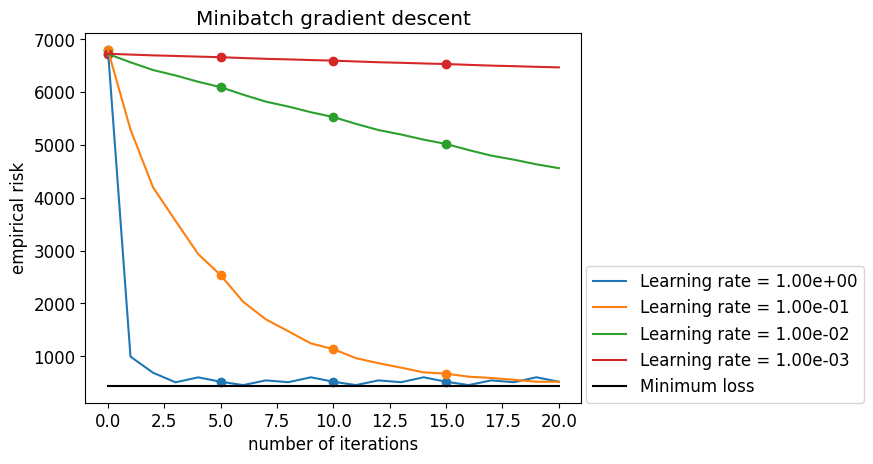

In [59]:
# List of values of learning rates to test
lr_list = [1, 1e-1, 1e-2, 1e-3]

tolerance = 1e-4
iterations = 20
bs = 20

# Loop over the learning rates
for lr in lr_list:
    # Run the minibatch gradient descent
    losses, beta_mgd = minibatch_gradient_descent(X_bt, y, batch_size=bs, learning_rate=lr, max_iters=iterations, tol=tolerance)

    # Plot loss
    plt.plot(np.arange(len(losses)), losses, label="Learning rate = %.2e" % lr)
    # Mark loss after each epoch
    n_iterations_per_epoch = int(np.ceil(n_samples/bs))
    n_epochs = int(iterations/n_iterations_per_epoch)
    plt.scatter([int(np.ceil(n_samples/bs))*idx for idx in range(n_epochs)],
                [losses[int(np.ceil(n_samples/bs))*idx] for idx in range(n_epochs)])

plt.plot([0, iterations], [beta_star_loss, beta_star_loss], '-k', label="Minimum loss")

plt.xlabel("number of iterations")
plt.ylabel("empirical risk")
plt.title("Minibatch gradient descent")
plt.legend(loc=(1.01, 0.))
plt.show()

__Comment:__

#### Impact of the batch size

##### __Question 13__
Now complete the code below to set the learning rate to a fixed value, and run the minibatch gradient descent for a few different choices of batch sizes. Comment on what you observe.

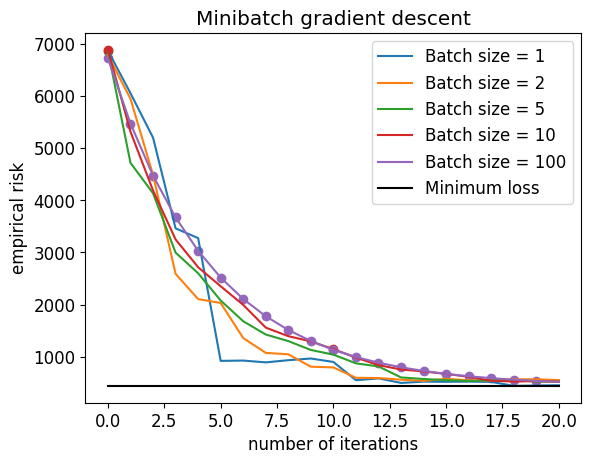

In [62]:
lr = 1e-1
tolerance = 1e-4
iterations = 20

batch_size_list = [1, 2, 5, 10, 100]

# Loop over the learning rates
for bs in batch_size_list:
    # Run the minibatch gradient descent
    losses, beta_mgd = minibatch_gradient_descent(X_bt, y, batch_size=bs, learning_rate=lr, max_iters=iterations, tol=tolerance)

    # Plot loss
    plt.plot(np.arange(len(losses)), losses, label="Batch size = %d" % bs)
    # Mark loss after each epoch
    n_iterations_per_epoch = int(np.ceil(n_samples/bs))
    n_epochs = int(iterations/n_iterations_per_epoch)
    plt.scatter([n_iterations_per_epoch*idx for idx in range(n_epochs)],
                [losses[int(n_iterations_per_epoch)*idx] for idx in range(n_epochs)])

plt.plot([0, iterations], [beta_star_loss, beta_star_loss], '-k', label="Minimum loss")

plt.xlabel("number of iterations")
plt.ylabel("empirical risk")
plt.title("Minibatch gradient descent")
plt.legend()
plt.show()

__Comment:__ You can see that a larger batch size corresponds with a smoother curve.

### 1.5 Stochastic Gradient Descent

Stochastic gradient descent is a special case of minibatch gradient descent:
* the batch size is set to 1
* one cycles randomly through the samples.

In the case of neural networks, which have a non-convex optimization problem, stochasticity also may help to avoid ending in local minima.

##### __Question 14__
Complete the implementation of the stochastic gradient descent below.

In [63]:
def stochastic_gradient_descent(X, y, learning_rate=1e-1, max_iters=20):
    """
    Stochastic gradient descent procedure for a linear regression.
    Parameters:
    X: (n_samples, n_features) numpy array
        The data matrix.

    y: (n_samples, ) numpy array
        The output/target vector.

    learning_rate: float
        The learning rate of the gradient descent.

    max_iters: int
        The maximum number of iters of the gradient descent.

    """

    # Random initialisation of beta
    beta_current = np.random.rand(X.shape[1])

    # Keep track of the values of the loss and of beta at each epoch
    losses = [squared_loss(X, y, beta_current)]

    # Vector of sample indices
    num_samples = X.shape[0]
    samples_indices = np.arange(num_samples)

    # Determine number of epochs
    n_epochs = int(ceil(max_iters/num_samples))

    for epoch in range(n_epochs):
        # Shuffle the samples
        np.random.shuffle(samples_indices)

        # The last epoch may not be full
        samples_indices = samples_indices[:min(num_samples, (max_iters-epoch*num_samples))]

        # Loop over the shuffled samples one by one
        for idx, sample_idx in enumerate(samples_indices):
            # update beta_current
            beta_current -= learning_rate * evaluate_gradient(X[sample_idx], y[sample_idx], beta_current)

            # compute the loss and append to losses
            losses.append(squared_loss(X, y, beta_current))

    return(np.array(losses), beta_current)

##### __Question 15__
Why aren't we using the norm of the gradient as stopping criterion any longer?

__Answer:__

##### __Question 16__
Complete the code below by chosing a learning rate `lr` and observe how the loss evolves as a function of the number of iterations. Comment.

In [64]:
# Run stochastic gradient descent
iterations = 200
lr = 1e-1
losses, betas = stochastic_gradient_descent(X_bt, y, learning_rate=lr, max_iters=iterations)

# Plot loss
plt.plot(np.arange(len(losses)), losses, label="Stochastic gradient descent")

# Mark loss after each epoch
n_epochs = int(iterations/n_samples)
plt.scatter([n_samples*idx for idx in range(n_epochs+1)], [losses[n_samples*idx] for idx in range(n_epochs+1)])

plt.xlabel("number of iterations")
plt.ylabel("empirical risk")

IndexError: tuple index out of range

__Comment:__

#### Comparing the three gradient descents

##### __Question 17__
Complete and run the following code to compare the three gradient descents by looking at their loss as a function of the number of iterations. Comment.

In [ ]:
tolerance = 1e-4
iterations = # TODO

# Run batch gradient descent with Newton-Raphson learning rate
lr = 1./sigma_max
losses, betas = batch_gradient_descent(X_bt, y, learning_rate=lr, max_iters=iterations, tol=tolerance)
# Plot loss
plt.plot(np.arange(len(losses)), losses, label="Batch gradient descent")

# Run minibatch gradient descent
bs = # TODO
lr = # TODO
losses, beta_mgd = minibatch_gradient_descent(X_bt, y, batch_size=bs, learning_rate=lr, max_iters=iterations, tol=tolerance)
# Plot loss
plt.plot(np.arange(len(losses)), losses, label="Minibatch gradient descent")

# Run stochastic gradient descent
losses, beta_sgd = stochastic_gradient_descent(X_bt, y, learning_rate=lr,  max_iters=iterations)
# Plot loss
plt.plot(np.arange(len(losses)), losses, label="Stochastic gradient descent")

# Plot closed-form loss
plt.plot([0, iterations], [beta_star_loss, beta_star_loss], '-k', label="Minimum loss")

plt.xlabel("number of iterations")
plt.ylabel("empirical risk")
plt.title("Comparing gradient descents")
plt.legend(loc=(1.01, 0))

__Comment:__

Another way to look at this is to look at the loss as a function of the *number of epochs*, that is to say the number of times the algorithm looked at the entire data set.

##### __Question 18__
Complete and run the following code to compare the three gradient descents by looking at their loss as a function of the number of epochs. Comment.

In [ ]:
tolerance = 1e-4
epochs = # TODO

# Run batch gradient descent
lr = 1./sigma_max
losses, betas = batch_gradient_descent(X_bt, y, learning_rate=lr, max_iters=epochs, tol=tolerance)
# Plot loss
plt.semilogy(np.arange(len(losses)), losses, label="Batch gradient descent")

# Run minibatch gradient descent
bs = # TODO use the same value as for the comparison per number of iterations
lr = # TODO use the same value as for the comparison per number of iterations
n_iterations_per_epoch = int(np.ceil(n_samples/bs))
iterations = epochs * n_iterations_per_epoch
losses, beta_mgd = minibatch_gradient_descent(X_bt, y, batch_size=bs, learning_rate=lr, max_iters=iterations, tol=tolerance)
# Plot loss
plt.plot(np.arange(len(losses))/n_iterations_per_epoch, losses, label="Minibatch gradient descent")

# Run stochastic gradient descent
iterations = epochs * n_samples
losses, beta_sgd = stochastic_gradient_descent(X_bt, y, learning_rate=lr,  max_iters=iterations)
# Plot loss
plt.plot(np.arange(len(losses))/n_samples, losses, label="Stochastic gradient descent")

# Plot closed-form loss
plt.plot([0, epochs], [beta_star_loss, beta_star_loss], '-k', label="Minimum loss")

plt.xlabel("number of epochs")
plt.ylabel("empirical risk")
plt.title("Comparing gradient descents")
plt.legend(loc=(1.01, 0))

__Comment:__

### 1.6 Multivariate linear regression

The code we have written so far can be applied to data sets with more than one feature.

##### __Question 19__
Complete the following code to compare the three types of gradient descent for a larger dataset, with 30 features. Play with the learning rates and batch sizes. Note and discuss what you observe.

In [ ]:
n_samples = 1000
n_features = 30
X, y = datasets.make_regression(n_samples=n_samples, n_features=n_features, n_informative=n_features, noise=50, random_state=37)

In [ ]:
# bias trick
X_bt = np.hstack((np.ones((n_samples, 1)), X))

In [ ]:
# closed-form solution
beta_star = # TODO
beta_star_loss = # TODO

In [ ]:
# optimal learning rate for batch
lr_optim = # TODO

In [ ]:
tolerance = 1e-4
epochs = 10 # TODO change this value if you wish

# Run batch gradient descent
lr = 1./sigma_max
losses, betas = batch_gradient_descent(X_bt, y, learning_rate=lr, max_iters=epochs, tol=tolerance)
# Plot loss
plt.plot(np.arange(len(losses)), losses, label="Batch gradient descent")

# Run minibatch gradient descent
bs = 20 # TODO try changing this value
lr = 5e-2 # TODO try changing this value
n_iterations_per_epoch = int(np.ceil(n_samples/bs))
iterations = epochs * n_iterations_per_epoch
losses, beta_mgd = minibatch_gradient_descent(X_bt, y, batch_size=bs, learning_rate=lr, max_iters=iterations, tol=tolerance)
# Plot loss
plt.plot(np.arange(len(losses))/n_iterations_per_epoch, losses, label="Minibatch gradient descent")

# Run stochastic gradient descent
lr = 5e-3 # TODO try changing this value
iterations = epochs * n_samples
losses, beta_sgd = stochastic_gradient_descent(X_bt, y, learning_rate=lr,  max_iters=iterations)
# Plot loss
plt.plot(np.arange(len(losses))/n_samples, losses, label="Stochastic gradient descent")

# Plot closed-form loss
plt.plot([0, epochs], [beta_star_loss, beta_star_loss], '-k', label="Minimum loss")

plt.xlabel("number of epochs")
plt.ylabel("empirical risk")
plt.title("Comparing gradient descents")
plt.legend(loc=(1.01, 0))

__Comment:__

### 1.7 SGDRegressor in scikit-learn

The `SGDRegressor` class of `scikit-learn` ([doc](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.SGDRegressor.html#sklearn.linear_model.SGDRegressor)) makes it possible to learn linear regression models with various losses and regularizers, using stochastic gradient descent.

We can use it here instead of our hand-written procedures.

##### __Question 20__
Complete the code below to use `SGDRegressor` and compare it to our procedures. Comment.

In [ ]:
from sklearn import linear_model

In [ ]:
# Initialize an instance of SGDRegressor
regressor = linear_model.SGDRegressor(loss='squared_error',
                                      penalty='l2', alpha=1e-5, # you have to add a regularizer, so we use a very small regularization parameter
                                      max_iter=20, tol=1e-4, fit_intercept=False,
                                      learning_rate='constant', eta0=1e-3)

In [ ]:
# Learn
regressor.fit(X_bt, y)

In [ ]:
print(f"SGDRegressor stopped after {regressor.n_iter_} epochs.")

In [ ]:
# Compare the loss of the model learned by SGDRegressor with the minimum loss
print(f"Closed-form loss: {beta_star_loss:.2e}")
print(f"SGDRegressor loss: {squared_loss(X_bt, y, regressor.coef_):.2e}")

__Comment:__

## 2. Logistic regression

We will now work on binary classification with logistic regression.

### 2.1 Generating data

In [ ]:
from sklearn import datasets

In [ ]:
n_samples = 1000
n_features = 100
X, y = datasets.make_classification(n_samples=n_samples, n_features=n_features, n_informative=int(n_features/10), random_state=59)

In [ ]:
X.shape, y.shape

Let us standardize the data (each feature will be rescaled to have a mean of 0 and a standard deviation of 1):

In [ ]:
from sklearn import preprocessing

In [ ]:
scaler = preprocessing.StandardScaler()
X_scaled = scaler.fit_transform(X)

In [ ]:
# Bias trick
X_bt = np.hstack((np.ones((n_samples, 1)), X_scaled))

### 2.2 Optimization problem

In logistic regression, the model is
$\mathbb{P}(Y = 1|X) = \sigma(\boldsymbol\beta^\top \boldsymbol{x}),$ with $Y$ being a binary random variable from which the outputs are drawn, and $X$ a $p$-dimensional random vector from which the features are drawn.
$\sigma: u \mapsto \frac1{1+e^{-u}}$ is the __sigmoid__ or __logistic__ function.

The loss function is the __logistic loss__: $$\mathcal{L}(y, f(\boldsymbol{x})) = - y \log(f(\boldsymbol{x})- (1-y) \log(1-f(\boldsymbol{x})) $$

Hence our goal is to minimize
$$J(\boldsymbol\beta) = \frac1n \sum_{i=1}^n - y_i \log(\sigma(\boldsymbol\beta^\top \boldsymbol{x}_i))- (1-y_i) \log(1-\sigma(\boldsymbol\beta^\top \boldsymbol{x}_i))  $$

Because $\sigma^\prime(u) = \sigma(u) (1-\sigma(u))$, we can easily obtain the following gradient for $J$:
$$\nabla J(\boldsymbol\beta) = - \frac1n \sum_{i=1}^n \left(y_i - \sigma(\boldsymbol\beta^\top \boldsymbol{x}_i) \right) \boldsymbol{x}_i$$

Because we do not know how to solve
$$\frac1n \sum_{i=1}^n \left(y_i - \sigma(\boldsymbol\beta^\top \boldsymbol{x}_i) \right) \boldsymbol{x}_i = 0,$$
we do not have a closed-form solution.

However we can use gradient descent!

Here are an implementation of the evaluation of the logistic loss and of the gradient of the logistic regression.

In [ ]:
def sigmoid(u):
    return (1./(1+np.exp(-u)))

In [ ]:
def logistic_loss(X, y, beta):
    """
    Logistic loss of a logistic regression.
    Parameters:
    X: (n_samples, n_features) numpy array
        The data matrix.

    y: (n_samples, ) numpy array
        The output/target vector (0/1).

    beta: (n_features, ) numpy array
        The weight vector of the logistic regression.
    """
    where_y_pos = np.where(y)[0]
    loss_pos = - np.sum(np.log(sigmoid(X[where_y_pos, :].dot(beta))))
    where_y_neg = np.where(y==0)[0]
    loss_neg = - np.sum(np.log(1 - sigmoid(X[where_y_neg, :].dot(beta))))
    return (loss_pos + loss_neg)/np.size(y)

In [ ]:
def evaluate_gradient_logistic(X, y, b_value):
    """
    Gradient of the empirical risk of the logistic regression.
    """
    num_samples = X.shape[0]
    diff = sigmoid(X.dot(b_value)) - y
    return np.sum(np.multiply(diff, X.T), axis=1)/num_samples

### 2.2 Gradient descent

##### __Question 21__
Complete the following code to implement the batch gradient descent procedure for logistic regression.

In [ ]:
def batch_gradient_descent_logistic(X, y, learning_rate=1e-1, max_iters=30, tol=1e-2):
    """
    Batch gradient descent procedure for a logistic regression.
    Parameters:
    X: (n_samples, n_features) numpy array
        The data matrix.

    y: (n_samples, ) numpy array
        The output/target vector.

    learning_rate: float
        The learning rate of the gradient descent.

    max_iters: int
        The maximum number of iterations of the gradient descent.

    tol: float
        The tolerance of the gradient descent.

    Returns:
    losses: (n_iters, ) numpy array
        The loss at each iteration.

    beta_vector: (n_features, ) numpy array
        The fitted regression vector (i.e. the solution).
    """
    # TODO
    return(losses, beta_vector)

Now run the code below to run the batch gradient descent on the data.

In [ ]:
tolerance = 1e-4
iterations = 200
lr = 5.
losses, beta_final = batch_gradient_descent_logistic(X_bt, y, learning_rate=lr, max_iters=iterations, tol=tolerance)

In [ ]:
plt.plot(np.arange(len(losses)), losses)

plt.xlabel("number of iterations")
plt.ylabel("value of the loss")
plt.title("Batch gradient descent")

#### Quality of the model

##### __Question 22__
Complete the following code to compute the ROC curve of your model on the training data. Note again that here we're only trying to evaluate how well the model fits the data, and not whether it generalizes well. Comment.

In [ ]:
from sklearn import metrics

In [ ]:
y_pred_gd = # TODO

In [ ]:
fig = plt.figure(figsize=(4, 4))

fpr, tpr, thresholds = metrics.roc_curve(y, y_pred_gd)
plt.plot(fpr, tpr, label="Batch gradient descent (AUC=%.3f)" % metrics.auc(fpr, tpr))

plt.xlabel("TPR")
plt.ylabel("FPR")
plt.title("ROC curve (on the train set)")
plt.legend(loc=(1.01, .9))

__Comment:__

### 2.3 Comparing batch, minibatch and stochastic gradient descents

#### Minibatch gradient descent

##### __Question 23__
Complete the code below that implements minibatch gradient descent for the logistic regression.

In [ ]:
def minibatch_gradient_descent_logistic(X, y, batch_size=10, learning_rate=1e-1, max_iters=100, tol=1e-5):
    """
    Minibatch gradient descent procedure for a logistic regression.
    Parameters:
    X: (n_samples, n_features) numpy array
        The data matrix.

    y: (n_samples, ) numpy array
        The output/target vector.

    batch_size: int
        The number of samples in a batch.

    learning_rate: float
        The learning rate of the gradient descent.

    max_iters: int
        The maximum number of iterations of the gradient descent.

    tol: float
        The tolerance of the gradient descent

    Returns:
    losses: (n_iters, ) numpy array
        The loss at each iteration.

    beta_vector: (n_features, ) numpy array
        The fitted regression vector (i.e. the solution).
    """
    # TODO
    return(losses, beta_vector)

#### Stochastic gradient descent

##### __Question 24__
Complete the code below that implements stochastic gradient descent for the logistic regression.

In [ ]:
def stochastic_gradient_descent_logistic(X, y, learning_rate=1e-1, max_iters=20):
    """
    Stochastic gradient descent procedure for a logistic regression.
    Parameters:
    X: (n_samples, n_features) numpy array
        The data matrix.

    y: (n_samples, ) numpy array
        The output/target vector.

    learning_rate: float
        The learning rate of the gradient descent.

    max_iters: int
        The maximum number of iters of the gradient descent.

    Returns:
    losses: (n_iters, ) numpy array
        The loss at each iteration.

    beta_vector: (n_features, ) numpy array
        The fitted regression vector (i.e. the solution).

    """
    # TODO
    return(losses, beta_vector)

#### Comparison per number of iterations

##### __Question 25__
Complete the code below to compare the evolution of the loss, for the batch, minibatch, and stochastic gradient descents, as a function of the number of iterations. Comment.

In [ ]:
tolerance = 1e-4
iterations = 50 # TODO change this value if you wish

# Run batch gradient descent
lr = 1. # TODO try changing this value
bgd_losses, bgd_beta = batch_gradient_descent_logistic(X_bt, y, learning_rate=lr, max_iters=iterations, tol=tolerance)

In [ ]:
# Run minibatch gradient descent
bs = 50 # TODO try changing this value
lr = 0.1 # TODO try changing this value
mgd_losses, mgd_beta = minibatch_gradient_descent_logistic(X_bt, y, batch_size=bs, learning_rate=lr, max_iters=iterations, tol=tolerance)

In [ ]:
# Run stochastic gradient descent
lr = 1e-2 # TODO try changing this value
sgd_losses, sgd_beta = stochastic_gradient_descent_logistic(X_bt, y, learning_rate=lr, max_iters=iterations)

In [ ]:
# Plot batch gradient loss
plt.plot(np.arange(len(bgd_losses)), bgd_losses, label="Batch gradient descent")

# Plot loss
plt.plot(np.arange(len(mgd_losses)), mgd_losses, label="Minibatch gradient descent")

# Plot loss
plt.plot(np.arange(len(sgd_losses)), sgd_losses, label="Stochastic gradient descent")

plt.xlabel("number of iterations")
plt.ylabel("value of the loss")
plt.title("Comparing gradient descents")
plt.legend(loc=(1.01, 0))

__Comment:__

#### Comparison per number of epochs

##### __Question 26__
Complete the code below to compare the evolution of the loss, for the batch, minibatch, and stochastic gradient descents, as a function of the number of epochs. Comment.

In [ ]:
tolerance = 1e-4
epochs = 5 # TODO change this is you wish

# Run batch gradient descent
lr = # TODO use the same value as for the comparison per number of iterations
bgd_losses, bgd_beta = batch_gradient_descent_logistic(X_bt, y, learning_rate=lr, max_iters=epochs, tol=tolerance)

In [ ]:
# Run minibatch gradient descent
bs = # TODO use the same value as for the comparison per number of iterations
lr = # TODO use the same value as for the comparison per number of iterations
n_iterations_per_epoch = int(np.ceil(n_samples/bs))
iterations = epochs * n_iterations_per_epoch
mgd_losses, mgd_beta = minibatch_gradient_descent_logistic(X_bt, y, batch_size=bs, learning_rate=lr, max_iters=iterations, tol=tolerance)

In [ ]:
# Run stochastic gradient descent
lr = # TODO use the same value as for the comparison per number of iterations
iterations = epochs * n_samples
sgd_losses, sgd_beta = stochastic_gradient_descent_logistic(X_bt, y, learning_rate=lr, max_iters=iterations)

In [ ]:
plt.semilogy(np.arange(len(bgd_losses)), bgd_losses, label="Batch gradient descent")
plt.semilogy(np.arange(len(mgd_losses))/n_iterations_per_epoch, mgd_losses, label="Minibatch gradient descent")
plt.semilogy(np.arange(len(sgd_losses))/n_samples, sgd_losses, label="Stochastic gradient descent")

plt.xlabel("number of epochs")
plt.ylabel("empirical risk")
plt.title("Comparing gradient descents")
plt.legend(loc=(1.01, 0))

__Comment:__

### 2.4 SGDClassifier in scikit-learn

##### __Question 27__
Complete the code below to use the `SGDClassifier` class of scikit-learn ([doc](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.SGDClassifier.html)) instead of the above hand-written procedures. Comment.

In [ ]:
# Initialize an instance of SGDClassifier
classifier = linear_model.SGDClassifier(# TODO)

In [ ]:
# Learn
classifier.fit(X_bt, y)

In [ ]:
print(f"SGDClassifier stopped after {classifier.n_iter_} epochs.")

In [ ]:
# Compare the loss of the model learned by SGDClassifier with the minimum loss
sgd_loss = logistic_loss(X_bt, y, classifier.coef_.reshape((X_bt.shape[1], )))
print(f"SGDClassifier loss: {sgd_loss:.2e}")

In [ ]:
plt.semilogy(np.arange(len(bgd_losses)), bgd_losses, label="Batch gradient descent")
plt.semilogy(np.arange(len(mgd_losses))/n_iterations_per_epoch, mgd_losses, label="Minibatch gradient descent")
plt.semilogy(np.arange(len(sgd_losses))/n_samples, sgd_losses, label="Stochastic gradient descent")

plt.semilogy([0, epochs], [sgd_loss, sgd_loss], 'k--', label=('SGDClassifier after %d epochs' % classifier.n_iter_))

plt.xlabel("number of epochs")
plt.ylabel("empirical risk")
plt.title("Comparing gradient descents")
plt.legend(loc=(1.01, 0))

__Comment:__